In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import pickle

from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, LSTM, TimeDistributed, InputLayer, Reshape, BatchNormalization, Bidirectional

2022-12-15 10:38:37.133280: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
metadata = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/metadata_final.csv")
# metadata = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//emodb/metadata_final.csv")
metadata

,path,filename,chunk,label,actor,gender,mod
0,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,0
1,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,0
2,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
3,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,1,sad,13,f,1
4,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Tc.wav,0,sad,13,f,1
...,...,...,...,...,...,...,...
4144,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
4145,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,1,happy,8,f,2
4146,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2
4147,/datasets/nicolas_facchinetti/emodb/data/08b01...,08b01Fe.wav,0,happy,8,f,2


In [5]:
data = pickle.load(open("/datasets/nicolas_facchinetti/processed_data/emodb/processed_data.p", "rb" ))
data['x'].shape, data['y'].shape

((4149, 261, 128, 1), (4149, 5))

In [70]:
data['x'].reshape(4149,-1).shape

(4149, 33408)

In [71]:
data['x'].reshape(4149,-1)[0]

array([4.2116844e-05, 5.0917628e-05, 3.9130395e-05, ..., 2.6573029e-05,
       2.6573029e-05, 2.6573029e-05], dtype=float32)

In [52]:
data['x'][0].mean()

2.9932944e-05

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [72]:
scaler.fit(data['x'].reshape(4149,-1))

StandardScaler()

In [73]:
scaler.mean_

array([3.00511732e-05, 3.46847881e-05, 3.12123624e-05, ...,
       2.54386485e-05, 2.53140570e-05, 2.52745340e-05])

In [74]:
scaled = scaler.transform(data['x'].reshape(4149,-1))

In [75]:
scaled.shape

(4149, 33408)

In [83]:
scaled[4].mean(), data['x'][4].mean()

(-0.0027813495, 2.993295e-05)

In [84]:
scaled[4].std(), data['x'][4].std()

(0.71069, 7.740281e-06)

In [6]:
from sklearn.model_selection import train_test_split

In [86]:
scaled = scaled.reshape((4149, 261, 128, 1))

In [7]:
# get train/test dataframe
train_df, test_df = train_test_split(metadata, 
                                   test_size = 0.1, 
                                   random_state = 1997,
                                   stratify = metadata['label'])

In [8]:
train_df

,path,filename,chunk,label,actor,gender,mod
999,/datasets/nicolas_facchinetti/emodb/data/13b03...,13b03Td.wav,1,sad,13,f,2
3613,/datasets/nicolas_facchinetti/emodb/data/13a02...,13a02Fa.wav,0,happy,13,f,1
2796,/datasets/nicolas_facchinetti/emodb/data/08a05...,08a05Wa.wav,0,angry,8,f,2
2259,/datasets/nicolas_facchinetti/emodb/data/11a05...,11a05Ad.wav,0,fear,11,m,2
1588,/datasets/nicolas_facchinetti/emodb/data/10a02...,10a02Wa.wav,0,angry,10,m,2
...,...,...,...,...,...,...,...
1968,/datasets/nicolas_facchinetti/emodb/data/14a02...,14a02Nc.wav,0,neutral,14,f,2
1935,/datasets/nicolas_facchinetti/emodb/data/03a02...,03a02Wb.wav,0,angry,3,m,1
2459,/datasets/nicolas_facchinetti/emodb/data/12b02...,12b02Ad.wav,0,fear,12,m,1
2003,/datasets/nicolas_facchinetti/emodb/data/09b03...,09b03Wb.wav,1,angry,9,f,2


In [9]:
test_df

,path,filename,chunk,label,actor,gender,mod
369,/datasets/nicolas_facchinetti/emodb/data/14a05...,14a05Ac.wav,0,fear,14,f,2
3708,/datasets/nicolas_facchinetti/emodb/data/13b09...,13b09Fb.wav,0,happy,13,f,1
2953,/datasets/nicolas_facchinetti/emodb/data/09a07...,09a07Ta.wav,0,sad,9,f,1
2504,/datasets/nicolas_facchinetti/emodb/data/15a02...,15a02Wb.wav,0,angry,15,m,1
4104,/datasets/nicolas_facchinetti/emodb/data/15a04...,15a04Wa.wav,0,angry,15,m,2
...,...,...,...,...,...,...,...
1007,/datasets/nicolas_facchinetti/emodb/data/13a05...,13a05Aa.wav,0,fear,13,f,1
3732,/datasets/nicolas_facchinetti/emodb/data/12b01...,12b01Ta.wav,1,sad,12,m,2
1465,/datasets/nicolas_facchinetti/emodb/data/14b10...,14b10Tc.wav,0,sad,14,f,1
4067,/datasets/nicolas_facchinetti/emodb/data/16b01...,16b01Tb.wav,0,sad,16,f,1


In [10]:
train_df.index, test_df.index

(Int64Index([ 999, 3613, 2796, 2259, 1588, 3293, 3316,  394, 3844, 3196,
             ...
             3801,  759,  881, 3412,  387, 1968, 1935, 2459, 2003, 3689],
            dtype='int64', length=3734),
 Int64Index([ 369, 3708, 2953, 2504, 4104, 2799, 1573, 2733, 3063, 3142,
             ...
             2137, 3661, 1760,  606, 1966, 1007, 3732, 1465, 4067, 2638],
            dtype='int64', length=415))

In [25]:
import matplotlib.pyplot as plt
from collections.abc import Iterable

def plot_res_acc(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_res_loss(h, x, y):
    plt.subplot(x, 2, y)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
def plot_stats(h):
    if type(h) is not Iterable:
        h = [h]
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    for num, c in enumerate(h):
        n = (num+1)*2
        plot_res_acc(c, len(h), n-1)
        plot_res_loss(c, len(h), n)
    plt.show()

In [18]:
def train_evaluate(model_fn, train, val, opt='adam'):
    m = model_fn()
    m.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
    # fit & predict
    history = m.fit(train[0], train[1],
                    epochs=100,
                    validation_data=(val[0], val[1]),
                    verbose=1)
    print("Done")
    return history

In [13]:
cat = metadata["label"].unique()
cat

array(['sad', 'fear', 'neutral', 'happy', 'angry'], dtype=object)

In [14]:
def train_kfold(kf, metadata, model_fn, x, y):
    results = []
    for train_index, val_index in kf:
        x_train = x[train_index]
        y_train = y[train_index]
        x_test = x[val_index]
        y_test = y[val_index]
        
        results.append(train_evaluate(model_fn, (x_train, y_train), (x_test, y_test)))
    return results

# Models

In [15]:
def get_m12():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(8, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(1, return_sequences=False, dropout=0.2),
            
            Dense(5, activation='softmax')
    ])
    return m

get_m12().summary()

2022-12-15 10:39:38.976025: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-12-15 10:39:38.976893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-12-15 10:39:39.066798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:15:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 607.97GiB/s
2022-12-15 10:39:39.066831: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-12-15 10:39:39.081267: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-12-15 10:39:39.081336: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 25, 124, 8)     208       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 25, 124, 8)     32        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 9, 12, 62, 8)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 9, 10, 60, 16)     1168      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 9, 9, 59, 16)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 9, 8496)           0

In [19]:
t1 = train_evaluate(get_m12,
                    (data['x'][train_df.index], data['y'][train_df.index]),
                    (data['x'][test_df.index], data['y'][test_df.index]))

Epoch 1/100
117/117 [==============================] - 3s 14ms/step - loss: 1.6087 - accuracy: 0.2323 - val_loss: 1.6051 - val_accuracy: 0.2458
Epoch 2/100
117/117 [==============================] - 1s 11ms/step - loss: 1.6036 - accuracy: 0.2476 - val_loss: 1.6028 - val_accuracy: 0.2458
Epoch 3/100
117/117 [==============================] - 1s 12ms/step - loss: 1.6029 - accuracy: 0.2481 - val_loss: 1.6015 - val_accuracy: 0.2458
Epoch 4/100
117/117 [==============================] - 1s 11ms/step - loss: 1.6033 - accuracy: 0.2418 - val_loss: 1.6007 - val_accuracy: 0.2458
Epoch 5/100
117/117 [==============================] - 1s 11ms/step - loss: 1.6001 - accuracy: 0.2391 - val_loss: 1.6003 - val_accuracy: 0.2458
Epoch 6/100
117/117 [==============================] - 1s 12ms/step - loss: 1.6036 - accuracy: 0.2308 - val_loss: 1.6001 - val_accuracy: 0.2458
Epoch 7/100
117/117 [==============================] - 1s 11ms/step - loss: 1.5995 - accuracy: 0.2422 - val_loss: 1.6000 - val_accuracy:

117/117 [==============================] - 1s 12ms/step - loss: 1.5983 - accuracy: 0.2531 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 58/100
117/117 [==============================] - 1s 11ms/step - loss: 1.5984 - accuracy: 0.2447 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 59/100
117/117 [==============================] - 1s 11ms/step - loss: 1.6036 - accuracy: 0.2238 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 60/100
117/117 [==============================] - 1s 12ms/step - loss: 1.6027 - accuracy: 0.2416 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 61/100
117/117 [==============================] - 1s 12ms/step - loss: 1.6013 - accuracy: 0.2432 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 62/100
117/117 [==============================] - 1s 11ms/step - loss: 1.5992 - accuracy: 0.2418 - val_loss: 1.5999 - val_accuracy: 0.2458
Epoch 63/100
117/117 [==============================] - 1s 12ms/step - loss: 1.5968 - accuracy: 0.2483 - val_loss: 1.5999 - val_accuracy: 0.245

In [20]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
            TimeDistributed(Conv2D(16, kernel_size=(5,5), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(4,4), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m13().summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_18 (TimeDis (None, 9, 25, 124, 16)    416       
_________________________________________________________________
time_distributed_19 (TimeDis (None, 9, 25, 124, 16)    64        
_________________________________________________________________
time_distributed_20 (TimeDis (None, 9, 11, 61, 16)     0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 9, 9, 59, 32)      4640      
_________________________________________________________________
time_distributed_22 (TimeDis (None, 9, 4, 29, 32)      0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, 9, 2, 27, 64)     

In [94]:
m = get_m13()

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# fit & predict
history = m.fit(scaled[train_df.index], data['y'][train_df.index],
                epochs=50,
                batch_size=32,
                validation_data=(scaled[test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/50
117/117 [==============================] - 3s 17ms/step - loss: 1.5764 - accuracy: 0.2622 - val_loss: 1.4632 - val_accuracy: 0.3807
Epoch 2/50
117/117 [==============================] - 2s 14ms/step - loss: 1.3969 - accuracy: 0.4523 - val_loss: 1.3438 - val_accuracy: 0.4554
Epoch 3/50
117/117 [==============================] - 2s 14ms/step - loss: 1.3006 - accuracy: 0.5064 - val_loss: 1.2412 - val_accuracy: 0.5349
Epoch 4/50
117/117 [==============================] - 2s 14ms/step - loss: 1.2369 - accuracy: 0.5444 - val_loss: 1.1950 - val_accuracy: 0.5470
Epoch 5/50
117/117 [==============================] - 2s 14ms/step - loss: 1.1620 - accuracy: 0.5929 - val_loss: 1.1535 - val_accuracy: 0.5952
Epoch 6/50
117/117 [==============================] - 2s 14ms/step - loss: 1.1135 - accuracy: 0.6428 - val_loss: 1.1031 - val_accuracy: 0.6627
Epoch 7/50
117/117 [==============================] - 2s 14ms/step - loss: 1.0715 - accuracy: 0.6499 - val_loss: 1.0556 - val_accuracy: 0.6651

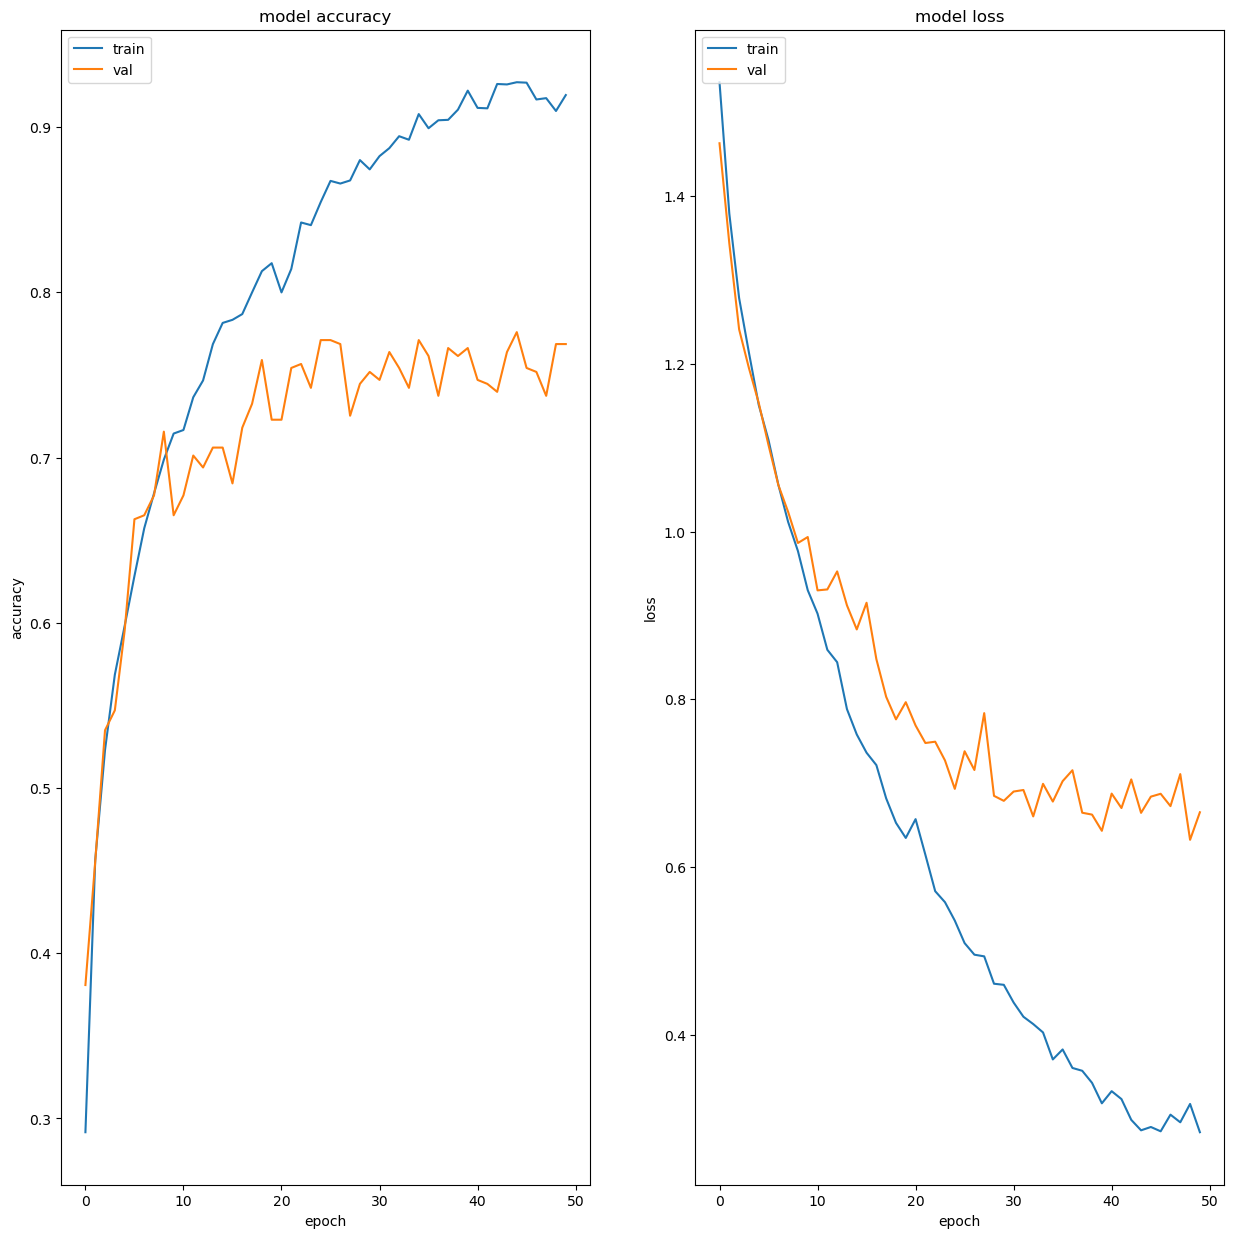

In [95]:
plot_stats(history)

In [98]:
m = get_m13()

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
# fit & predict
history = m.fit(data['x'][train_df.index], data['y'][train_df.index],
                epochs=50,
                batch_size=32,
                validation_data=(data['x'][test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/50
117/117 [==============================] - 3s 17ms/step - loss: 1.6069 - accuracy: 0.2166 - val_loss: 1.6008 - val_accuracy: 0.2458
Epoch 2/50
117/117 [==============================] - 2s 14ms/step - loss: 1.6019 - accuracy: 0.2419 - val_loss: 1.6010 - val_accuracy: 0.2458
Epoch 3/50
117/117 [==============================] - 2s 14ms/step - loss: 1.5971 - accuracy: 0.2433 - val_loss: 1.6002 - val_accuracy: 0.2458
Epoch 4/50
117/117 [==============================] - 2s 14ms/step - loss: 1.5962 - accuracy: 0.2571 - val_loss: 1.6009 - val_accuracy: 0.2458
Epoch 5/50
117/117 [==============================] - 2s 14ms/step - loss: 1.6033 - accuracy: 0.2357 - val_loss: 1.6002 - val_accuracy: 0.2458
Epoch 6/50
117/117 [==============================] - 2s 14ms/step - loss: 1.6011 - accuracy: 0.2466 - val_loss: 1.6835 - val_accuracy: 0.2120
Epoch 7/50
117/117 [==============================] - 2s 14ms/step - loss: 1.4807 - accuracy: 0.3853 - val_loss: 2.0836 - val_accuracy: 0.2120

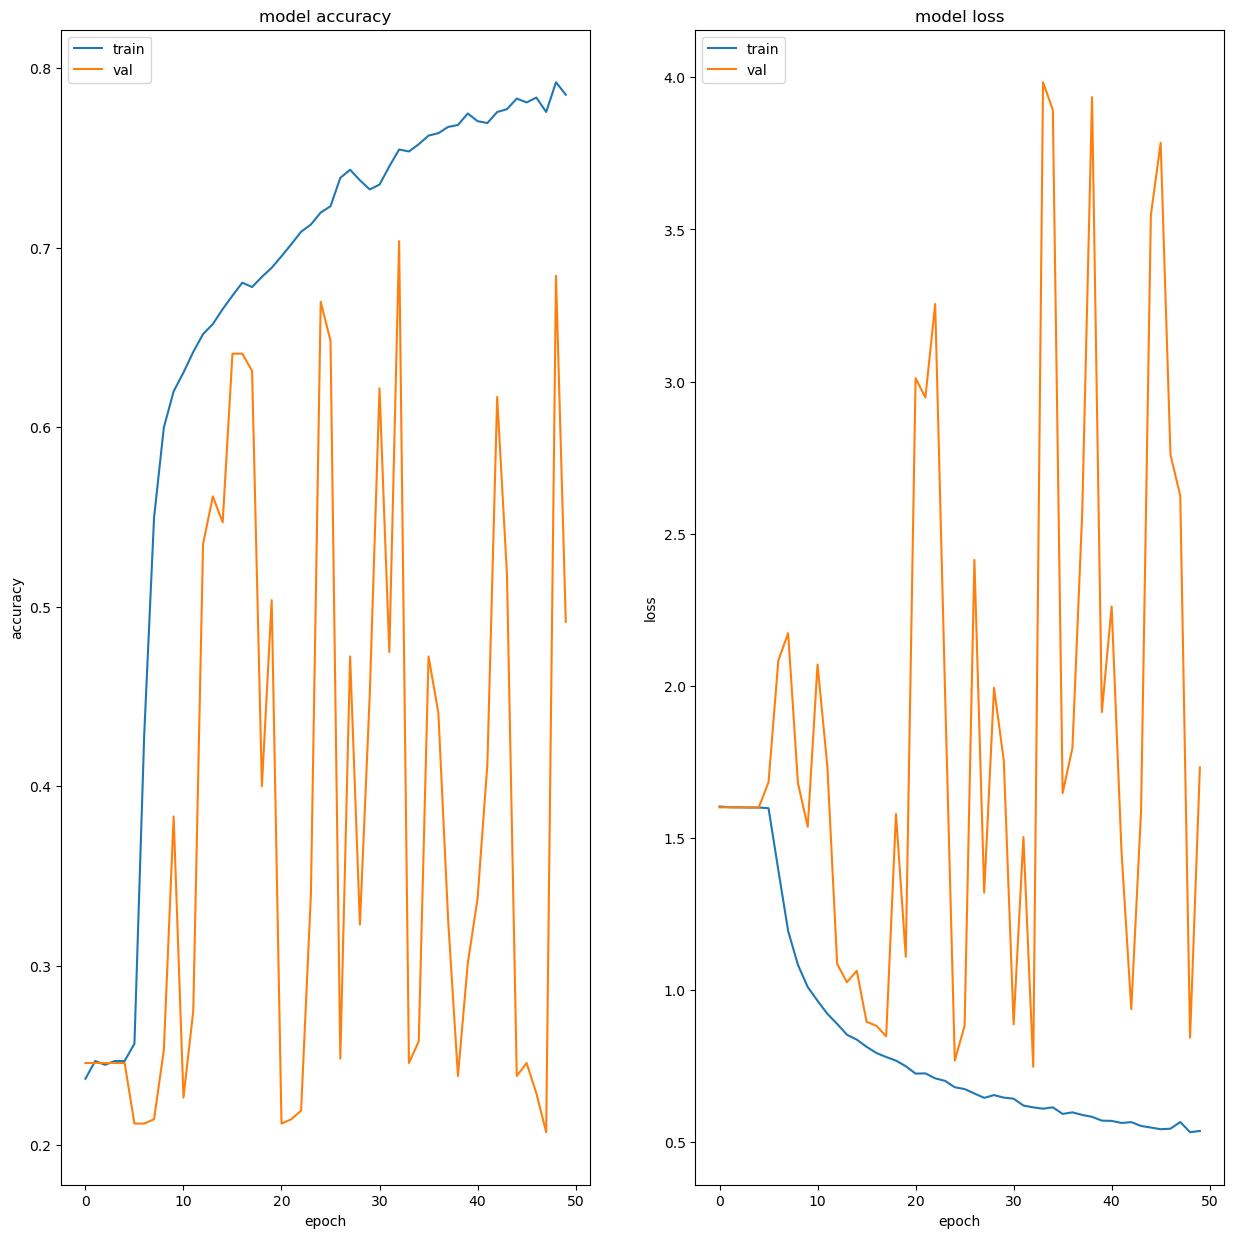

In [99]:
plot_stats(history)

In [100]:
def get_m15():
    m = Sequential([
            InputLayer(input_shape=(261,128,1)),
            Reshape((9,29,128,1)),
        
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),
            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(3, return_sequences=False, dropout=0.2),
            Dense(5, activation='softmax')
    ])
    return m

get_m15().summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 9, 29, 128, 1)     0         
_________________________________________________________________
time_distributed_218 (TimeDi (None, 9, 27, 126, 16)    160       
_________________________________________________________________
time_distributed_219 (TimeDi (None, 9, 27, 126, 16)    64        
_________________________________________________________________
time_distributed_220 (TimeDi (None, 9, 13, 63, 16)     0         
_________________________________________________________________
time_distributed_221 (TimeDi (None, 9, 11, 61, 32)     4640      
_________________________________________________________________
time_distributed_222 (TimeDi (None, 9, 5, 30, 32)      0         
_________________________________________________________________
time_distributed_223 (TimeDi (None, 9, 3, 28, 64)    

In [101]:
m = get_m15()

m.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')
# fit & predict
history = m.fit(scaled[train_df.index], data['y'][train_df.index],
                epochs=50,
                batch_size=32,
                validation_data=(scaled[test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/50
117/117 [==============================] - 3s 18ms/step - loss: 1.5739 - accuracy: 0.2586 - val_loss: 1.4499 - val_accuracy: 0.3542
Epoch 2/50
117/117 [==============================] - 2s 15ms/step - loss: 1.3988 - accuracy: 0.4374 - val_loss: 1.4044 - val_accuracy: 0.3976
Epoch 3/50
117/117 [==============================] - 2s 15ms/step - loss: 1.3361 - accuracy: 0.4543 - val_loss: 1.3126 - val_accuracy: 0.4458
Epoch 4/50
117/117 [==============================] - 2s 15ms/step - loss: 1.2900 - accuracy: 0.4775 - val_loss: 1.2781 - val_accuracy: 0.4651
Epoch 5/50
117/117 [==============================] - 2s 15ms/step - loss: 1.2690 - accuracy: 0.4736 - val_loss: 1.2391 - val_accuracy: 0.4723
Epoch 6/50
117/117 [==============================] - 2s 15ms/step - loss: 1.2354 - accuracy: 0.4989 - val_loss: 1.2241 - val_accuracy: 0.5181
Epoch 7/50
117/117 [==============================] - 2s 15ms/step - loss: 1.1977 - accuracy: 0.5695 - val_loss: 1.1709 - val_accuracy: 0.5831

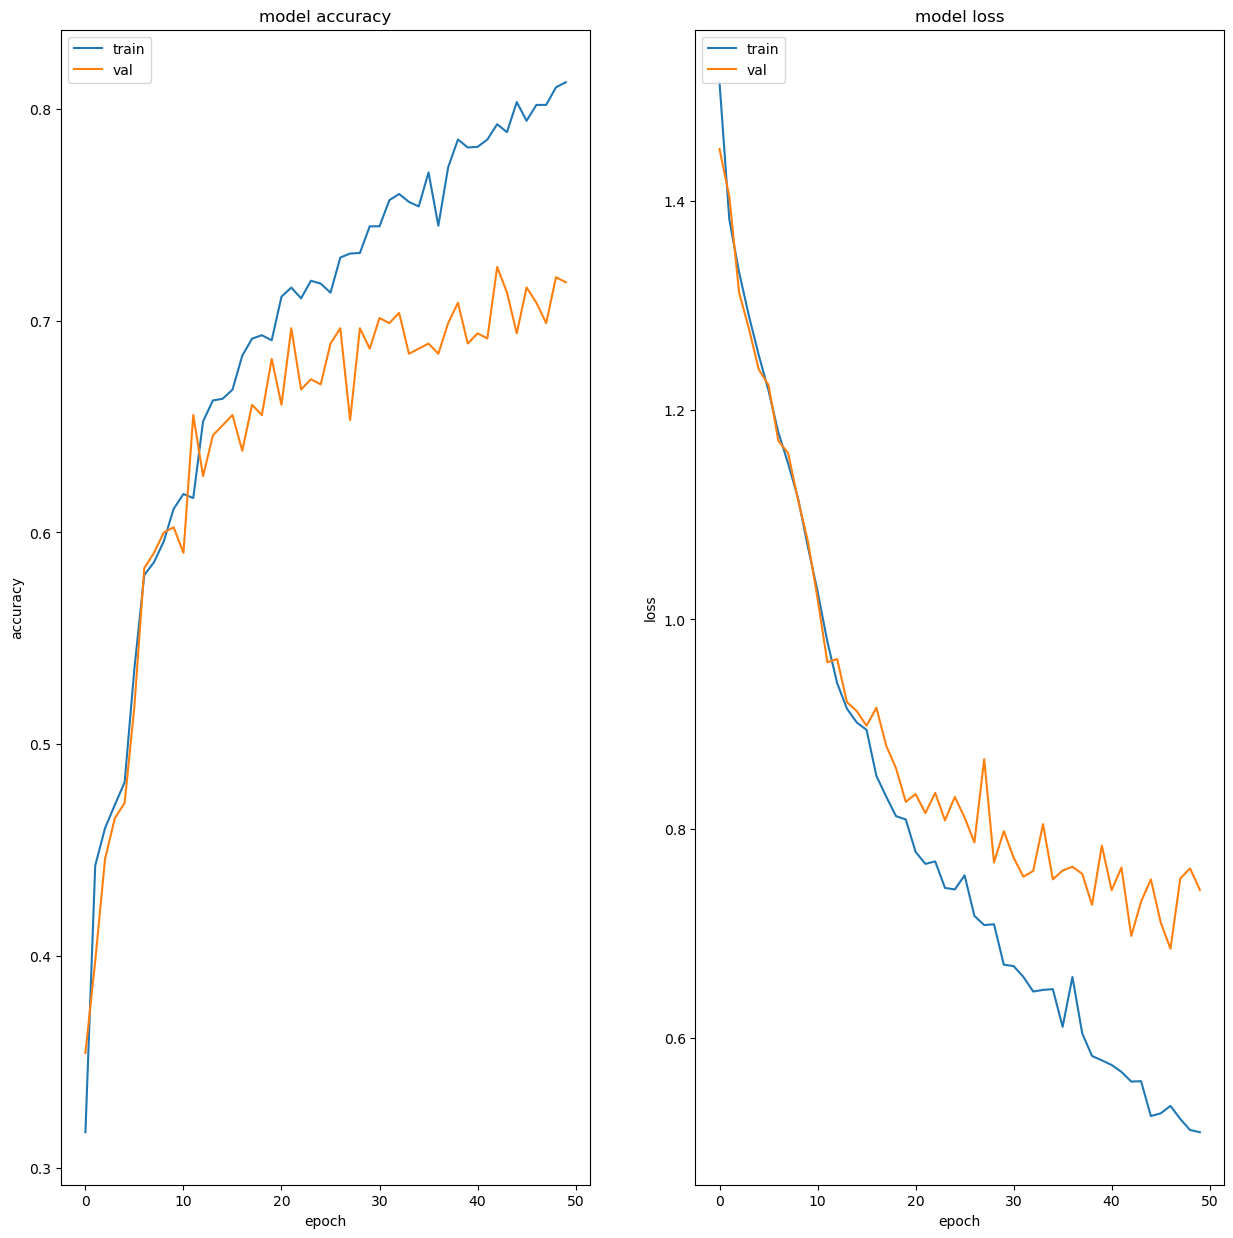

In [102]:
plot_stats(history)

In [103]:
m = get_m15()

m.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')
# fit & predict
history = m.fit(data['x'][train_df.index], data['y'][train_df.index],
                epochs=50,
                batch_size=32,
                validation_data=(data['x'][test_df.index], data['y'][test_df.index]),
                verbose=1)


Epoch 1/50
117/117 [==============================] - 3s 17ms/step - loss: 1.6040 - accuracy: 0.2343 - val_loss: 1.6039 - val_accuracy: 0.2458
Epoch 2/50
117/117 [==============================] - 2s 15ms/step - loss: 1.6027 - accuracy: 0.2394 - val_loss: 1.6000 - val_accuracy: 0.2458
Epoch 3/50
117/117 [==============================] - 2s 15ms/step - loss: 1.5994 - accuracy: 0.2516 - val_loss: 1.6001 - val_accuracy: 0.2458
Epoch 4/50
117/117 [==============================] - 2s 15ms/step - loss: 1.5989 - accuracy: 0.2448 - val_loss: 1.6001 - val_accuracy: 0.2458
Epoch 5/50
117/117 [==============================] - 2s 15ms/step - loss: 1.6000 - accuracy: 0.2533 - val_loss: 1.6000 - val_accuracy: 0.2458
Epoch 6/50
117/117 [==============================] - 2s 15ms/step - loss: 1.6011 - accuracy: 0.2469 - val_loss: 1.6001 - val_accuracy: 0.2458
Epoch 7/50
117/117 [==============================] - 2s 14ms/step - loss: 1.6015 - accuracy: 0.2440 - val_loss: 1.6000 - val_accuracy: 0.2458

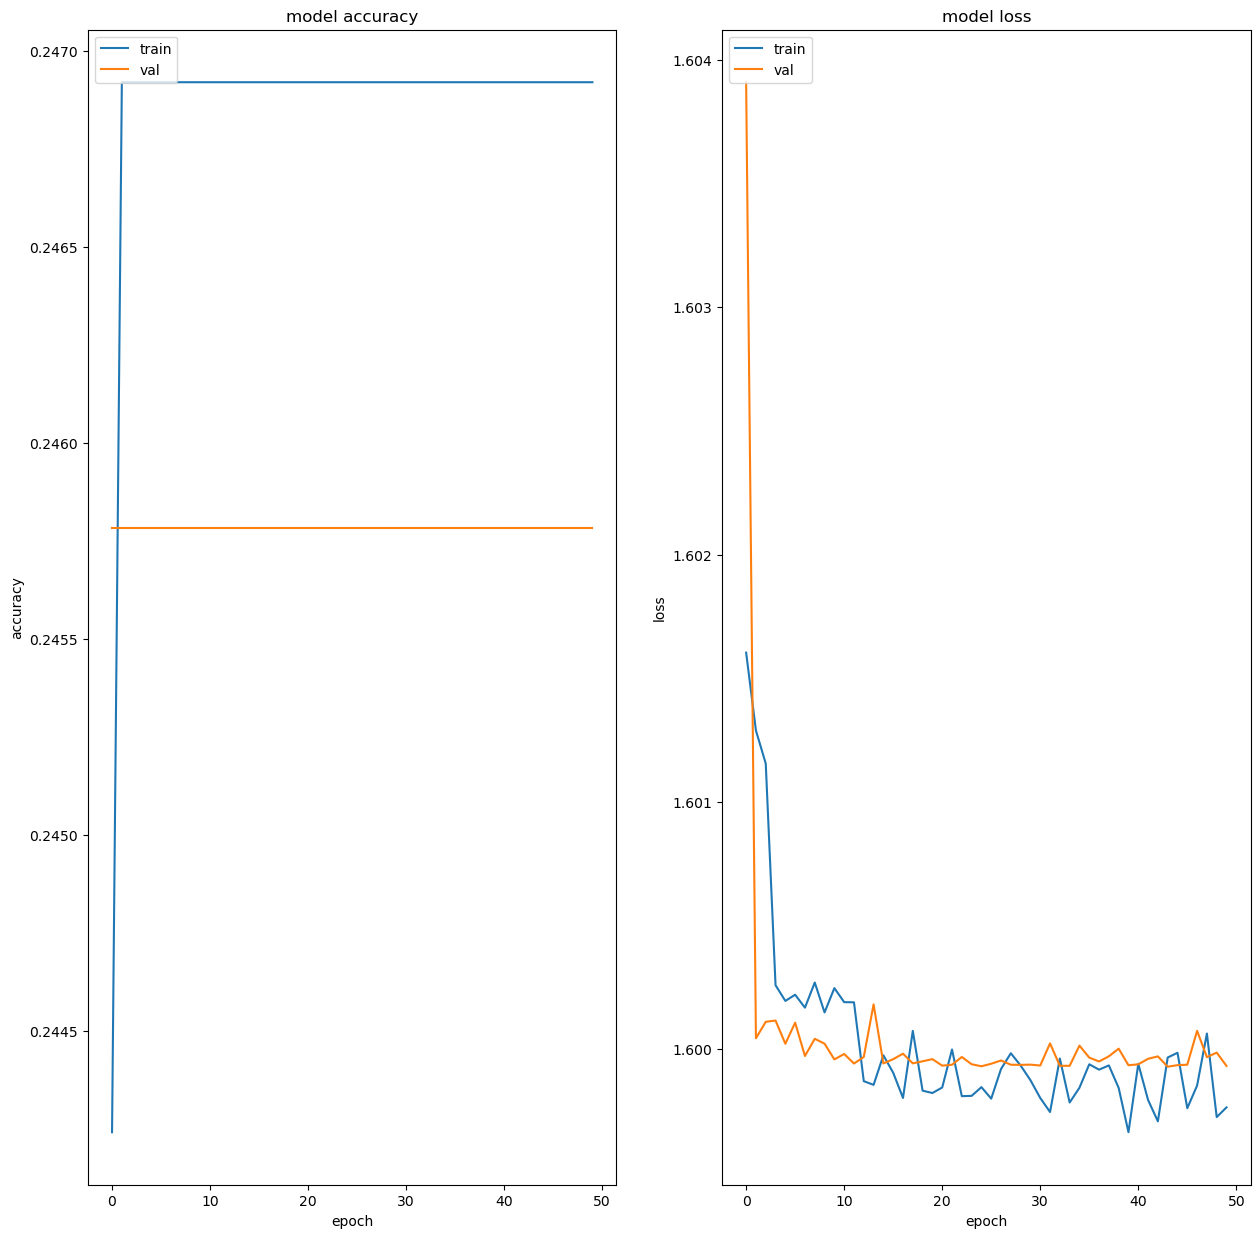

In [104]:
plot_stats(history)

In [104]:
def get_m13():
    m = Sequential([
            InputLayer(input_shape=(256,256,3)),
            Reshape((16,16,256,3)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            LSTM(8, dropout=0.4, return_sequences=True),
            LSTM(4, return_sequences=False),
            
            Dense(7, activation='softmax')
    ])
    return m

get_m13().summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 16, 16, 256, 3)    0         
_________________________________________________________________
time_distributed_234 (TimeDi (None, 16, 14, 254, 16)   448       
_________________________________________________________________
time_distributed_235 (TimeDi (None, 16, 14, 254, 16)   64        
_________________________________________________________________
time_distributed_236 (TimeDi (None, 16, 7, 127, 16)    0         
_________________________________________________________________
time_distributed_237 (TimeDi (None, 16, 5, 125, 32)    4640      
_________________________________________________________________
time_distributed_238 (TimeDi (None, 16, 4, 124, 32)    0         
_________________________________________________________________
time_distributed_239 (TimeDi (None, 16, 2, 122, 64)  

In [107]:
t2 = train_kfold(kf, metadata, get_m13)

Found 5610 validated image filenames belonging to 7 classes.
Found 572 validated image filenames belonging to 7 classes.
Epoch 1/30
88/88 [==============================] - 13s 127ms/step - loss: 1.8897 - accuracy: 0.2829 - val_loss: 1.8167 - val_accuracy: 0.3199
Epoch 2/30
88/88 [==============================] - 11s 119ms/step - loss: 1.7214 - accuracy: 0.3659 - val_loss: 1.6494 - val_accuracy: 0.3217
Epoch 3/30
88/88 [==============================] - 11s 119ms/step - loss: 1.6167 - accuracy: 0.3686 - val_loss: 2.1958 - val_accuracy: 0.1154
Epoch 4/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5874 - accuracy: 0.3967 - val_loss: 1.5470 - val_accuracy: 0.3584
Epoch 5/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5042 - accuracy: 0.4272 - val_loss: 1.7336 - val_accuracy: 0.2430
Epoch 6/30
88/88 [==============================] - 11s 120ms/step - loss: 1.5003 - accuracy: 0.4441 - val_loss: 1.7129 - val_accuracy: 0.2815
Epoch 7/30
88/88 [===

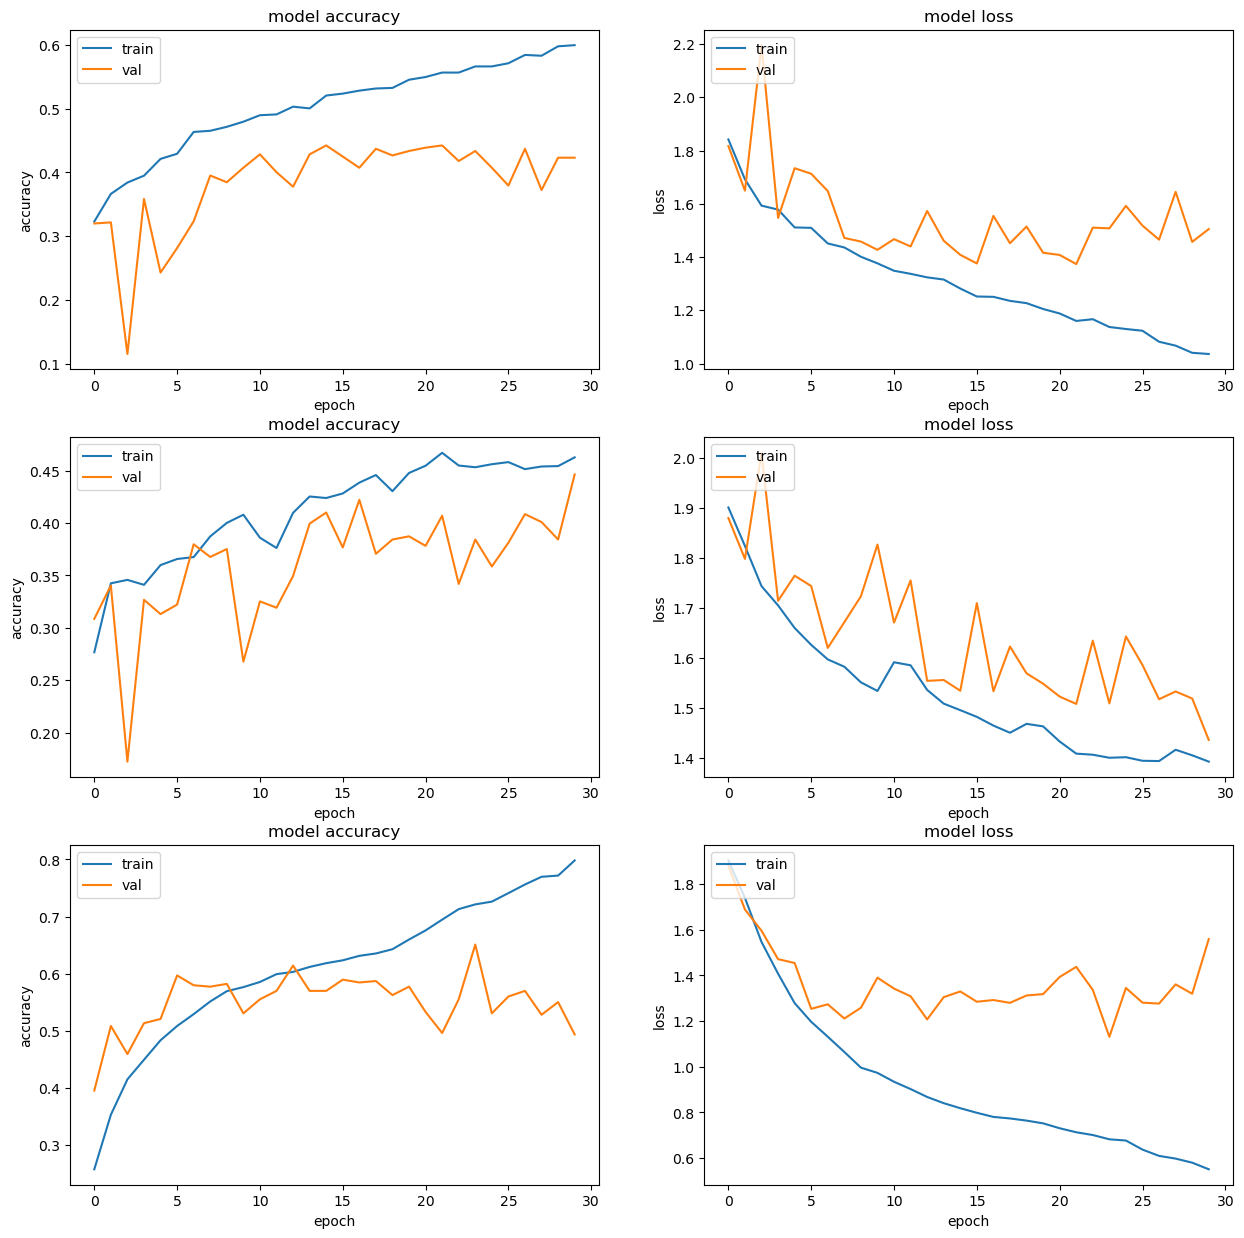

In [108]:
plot_stats(t2)

In [36]:
def get_m14():
    m = Sequential([
            InputLayer(input_shape=(256,256,3)),
            Reshape((16,16,256,3)),
            TimeDistributed(Conv2D(16, kernel_size=(3,3), activation='relu')),
            TimeDistributed(BatchNormalization()),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=2)),

            TimeDistributed(Conv2D(32, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),

            TimeDistributed(Conv2D(64, kernel_size=(3,3), activation='relu')),
            TimeDistributed(MaxPooling2D(pool_size=(2,2), strides=1)),
            TimeDistributed(Flatten()),
            
            Bidirectional(LSTM(8, dropout=0.4, return_sequences=True)),
            LSTM(4, return_sequences=False),
            
            Dense(7, activation='softmax')
    ])
    return m

get_m14().summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_32 (Reshape)         (None, 16, 16, 256, 3)    0         
_________________________________________________________________
time_distributed_261 (TimeDi (None, 16, 14, 254, 16)   448       
_________________________________________________________________
time_distributed_262 (TimeDi (None, 16, 14, 254, 16)   64        
_________________________________________________________________
time_distributed_263 (TimeDi (None, 16, 7, 127, 16)    0         
_________________________________________________________________
time_distributed_264 (TimeDi (None, 16, 5, 125, 32)    4640      
_________________________________________________________________
time_distributed_265 (TimeDi (None, 16, 4, 124, 32)    0         
_________________________________________________________________
time_distributed_266 (TimeDi (None, 16, 2, 122, 64)  

In [37]:
ac1_14 = train_avaluate(get_m14, kf1, data["emodb"]["x"], data["emodb"]["y"] )

Epoch 1/30
89/89 [==============================] - 9s 70ms/step - loss: 1.8793 - accuracy: 0.2378 - val_loss: 1.9070 - val_accuracy: 0.2783
Epoch 2/30
89/89 [==============================] - 5s 61ms/step - loss: 1.7533 - accuracy: 0.4097 - val_loss: 1.8034 - val_accuracy: 0.4601
Epoch 3/30
89/89 [==============================] - 5s 56ms/step - loss: 1.5973 - accuracy: 0.4602 - val_loss: 1.6771 - val_accuracy: 0.4657
Epoch 4/30
89/89 [==============================] - 5s 60ms/step - loss: 1.4962 - accuracy: 0.4819 - val_loss: 1.6530 - val_accuracy: 0.4063
Epoch 5/30
89/89 [==============================] - 6s 62ms/step - loss: 1.4118 - accuracy: 0.4973 - val_loss: 1.5113 - val_accuracy: 0.4007
Epoch 6/30
89/89 [==============================] - 6s 63ms/step - loss: 1.3538 - accuracy: 0.5100 - val_loss: 1.4536 - val_accuracy: 0.4230
Epoch 7/30
89/89 [==============================] - 5s 62ms/step - loss: 1.3166 - accuracy: 0.5188 - val_loss: 1.4225 - val_accuracy: 0.4100
Epoch 8/30
89

Epoch 29/30
86/86 [==============================] - 5s 64ms/step - loss: 0.3052 - accuracy: 0.9264 - val_loss: 1.0182 - val_accuracy: 0.6635
Epoch 30/30
86/86 [==============================] - 5s 63ms/step - loss: 0.3330 - accuracy: 0.9140 - val_loss: 1.1139 - val_accuracy: 0.6255
Done
Epoch 1/30
83/83 [==============================] - 10s 78ms/step - loss: 1.9071 - accuracy: 0.2179 - val_loss: 1.8886 - val_accuracy: 0.1929
Epoch 2/30
83/83 [==============================] - 5s 65ms/step - loss: 1.7483 - accuracy: 0.4036 - val_loss: 1.8654 - val_accuracy: 0.2043
Epoch 3/30
83/83 [==============================] - 5s 65ms/step - loss: 1.5960 - accuracy: 0.4047 - val_loss: 1.7521 - val_accuracy: 0.2717
Epoch 4/30
83/83 [==============================] - 5s 66ms/step - loss: 1.4725 - accuracy: 0.4742 - val_loss: 1.7813 - val_accuracy: 0.2409
Epoch 5/30
83/83 [==============================] - 5s 65ms/step - loss: 1.3818 - accuracy: 0.5141 - val_loss: 1.7453 - val_accuracy: 0.2774
Epoch

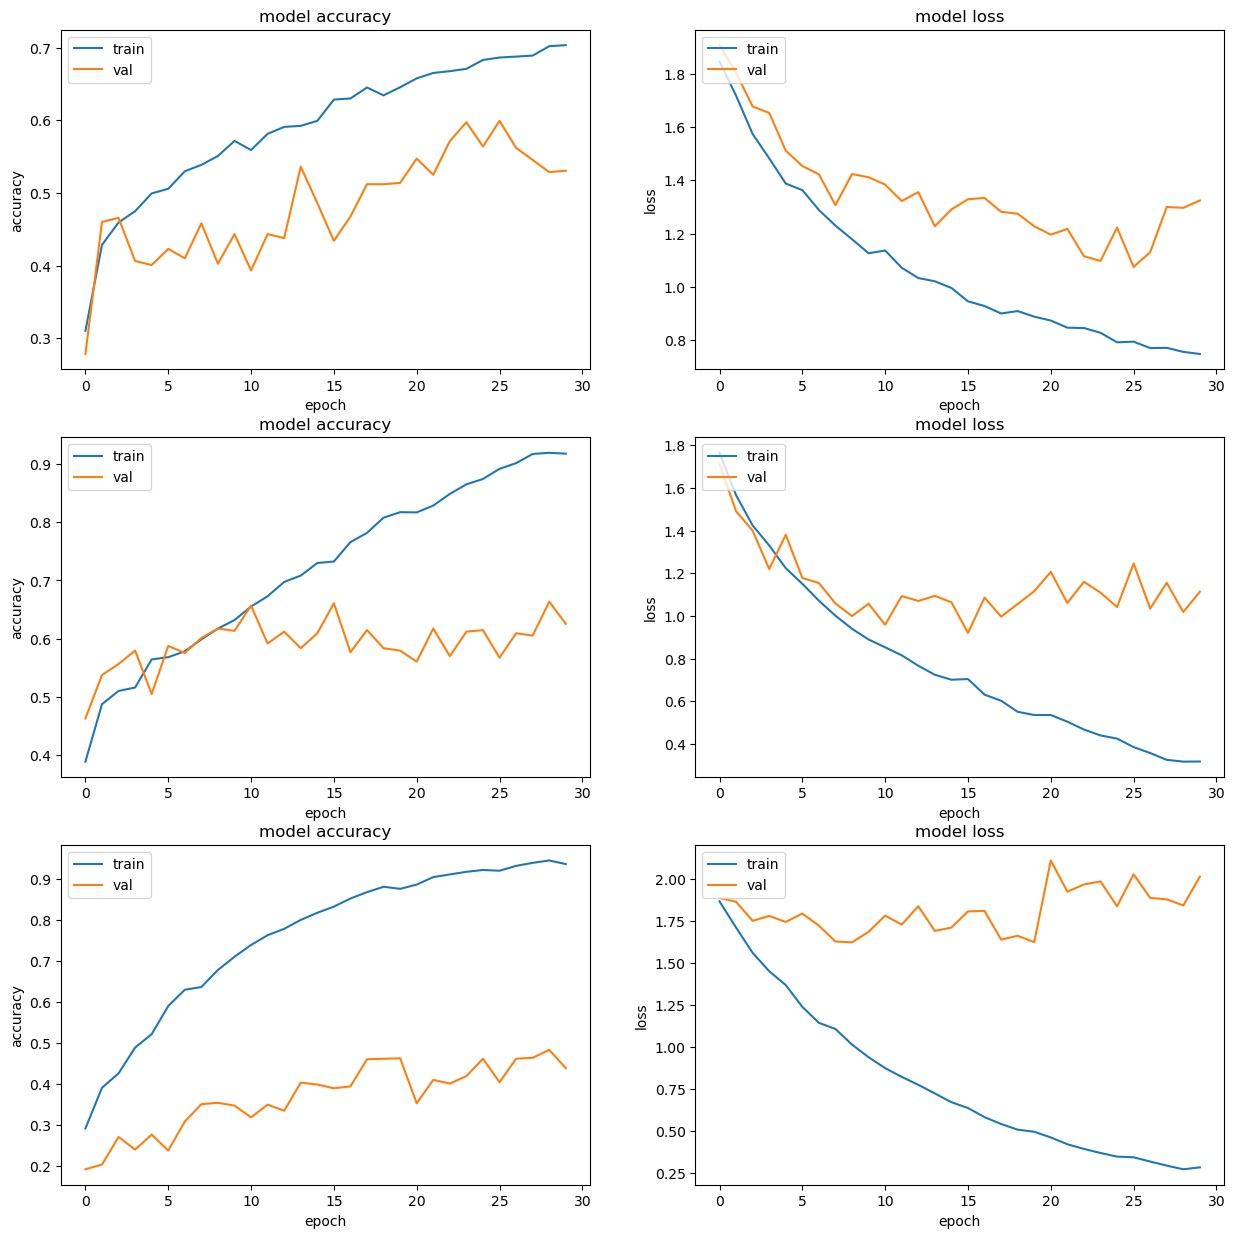

In [38]:
plot_stats(ac1_14)

In [39]:
def train_avaluate2(model_fn, kf, x, y):
    cv_acc = []
    for train_index, val_index in kf:
        m = model_fn()
        m.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
        # fit & predict
        history = m.fit(x[train_index], y[train_index],
                        batch_size=64,
                        epochs=50,
                        validation_data=(x[val_index], y[val_index]),
                        verbose=1)
        print("Done")
        cv_acc.append(history)
    return cv_acc

In [40]:
ac1_15 = train_avaluate2(get_m13, kf1, data["emodb"]["x"], data["emodb"]["y"] )

Epoch 1/50
89/89 [==============================] - 8s 67ms/step - loss: 1.8489 - accuracy: 0.3102 - val_loss: 1.8787 - val_accuracy: 0.2375
Epoch 2/50
89/89 [==============================] - 5s 59ms/step - loss: 1.7109 - accuracy: 0.4026 - val_loss: 1.8590 - val_accuracy: 0.1688
Epoch 3/50
89/89 [==============================] - 5s 59ms/step - loss: 1.6444 - accuracy: 0.4056 - val_loss: 1.6642 - val_accuracy: 0.4193
Epoch 4/50
89/89 [==============================] - 5s 59ms/step - loss: 1.5767 - accuracy: 0.4086 - val_loss: 1.5181 - val_accuracy: 0.4545
Epoch 5/50
89/89 [==============================] - 5s 59ms/step - loss: 1.5249 - accuracy: 0.4301 - val_loss: 1.4669 - val_accuracy: 0.4286
Epoch 6/50
89/89 [==============================] - 5s 59ms/step - loss: 1.4647 - accuracy: 0.4589 - val_loss: 1.8509 - val_accuracy: 0.1280
Epoch 7/50
89/89 [==============================] - 5s 59ms/step - loss: 1.4425 - accuracy: 0.4772 - val_loss: 1.5928 - val_accuracy: 0.3451
Epoch 8/50
89

Epoch 9/50
86/86 [==============================] - 5s 60ms/step - loss: 1.4447 - accuracy: 0.5082 - val_loss: 1.2828 - val_accuracy: 0.6554
Epoch 10/50
86/86 [==============================] - 5s 60ms/step - loss: 1.3836 - accuracy: 0.5328 - val_loss: 1.3422 - val_accuracy: 0.6309
Epoch 11/50
86/86 [==============================] - 5s 60ms/step - loss: 1.3481 - accuracy: 0.5376 - val_loss: 1.6797 - val_accuracy: 0.3867
Epoch 12/50
86/86 [==============================] - 5s 61ms/step - loss: 1.3180 - accuracy: 0.5393 - val_loss: 1.5341 - val_accuracy: 0.4912
Epoch 13/50
86/86 [==============================] - 5s 61ms/step - loss: 1.3518 - accuracy: 0.5166 - val_loss: 1.5364 - val_accuracy: 0.4057
Epoch 14/50
86/86 [==============================] - 5s 59ms/step - loss: 1.2835 - accuracy: 0.5517 - val_loss: 1.1636 - val_accuracy: 0.6404
Epoch 15/50
86/86 [==============================] - 5s 60ms/step - loss: 1.2367 - accuracy: 0.5694 - val_loss: 1.5542 - val_accuracy: 0.5142
Epoch 1

Epoch 17/50
83/83 [==============================] - 5s 61ms/step - loss: 1.2010 - accuracy: 0.5828 - val_loss: 1.8849 - val_accuracy: 0.2797
Epoch 18/50
83/83 [==============================] - 5s 61ms/step - loss: 1.1928 - accuracy: 0.5756 - val_loss: 1.6491 - val_accuracy: 0.3333
Epoch 19/50
83/83 [==============================] - 5s 61ms/step - loss: 1.1731 - accuracy: 0.5854 - val_loss: 1.8402 - val_accuracy: 0.3356
Epoch 20/50
83/83 [==============================] - 5s 60ms/step - loss: 1.1305 - accuracy: 0.5875 - val_loss: 1.6335 - val_accuracy: 0.3584
Epoch 21/50
83/83 [==============================] - 5s 63ms/step - loss: 1.1070 - accuracy: 0.6040 - val_loss: 1.6075 - val_accuracy: 0.3836
Epoch 22/50
83/83 [==============================] - 5s 62ms/step - loss: 1.0834 - accuracy: 0.6059 - val_loss: 1.4949 - val_accuracy: 0.4247
Epoch 23/50
83/83 [==============================] - 5s 62ms/step - loss: 1.0820 - accuracy: 0.6044 - val_loss: 1.4117 - val_accuracy: 0.4281
Epoch 

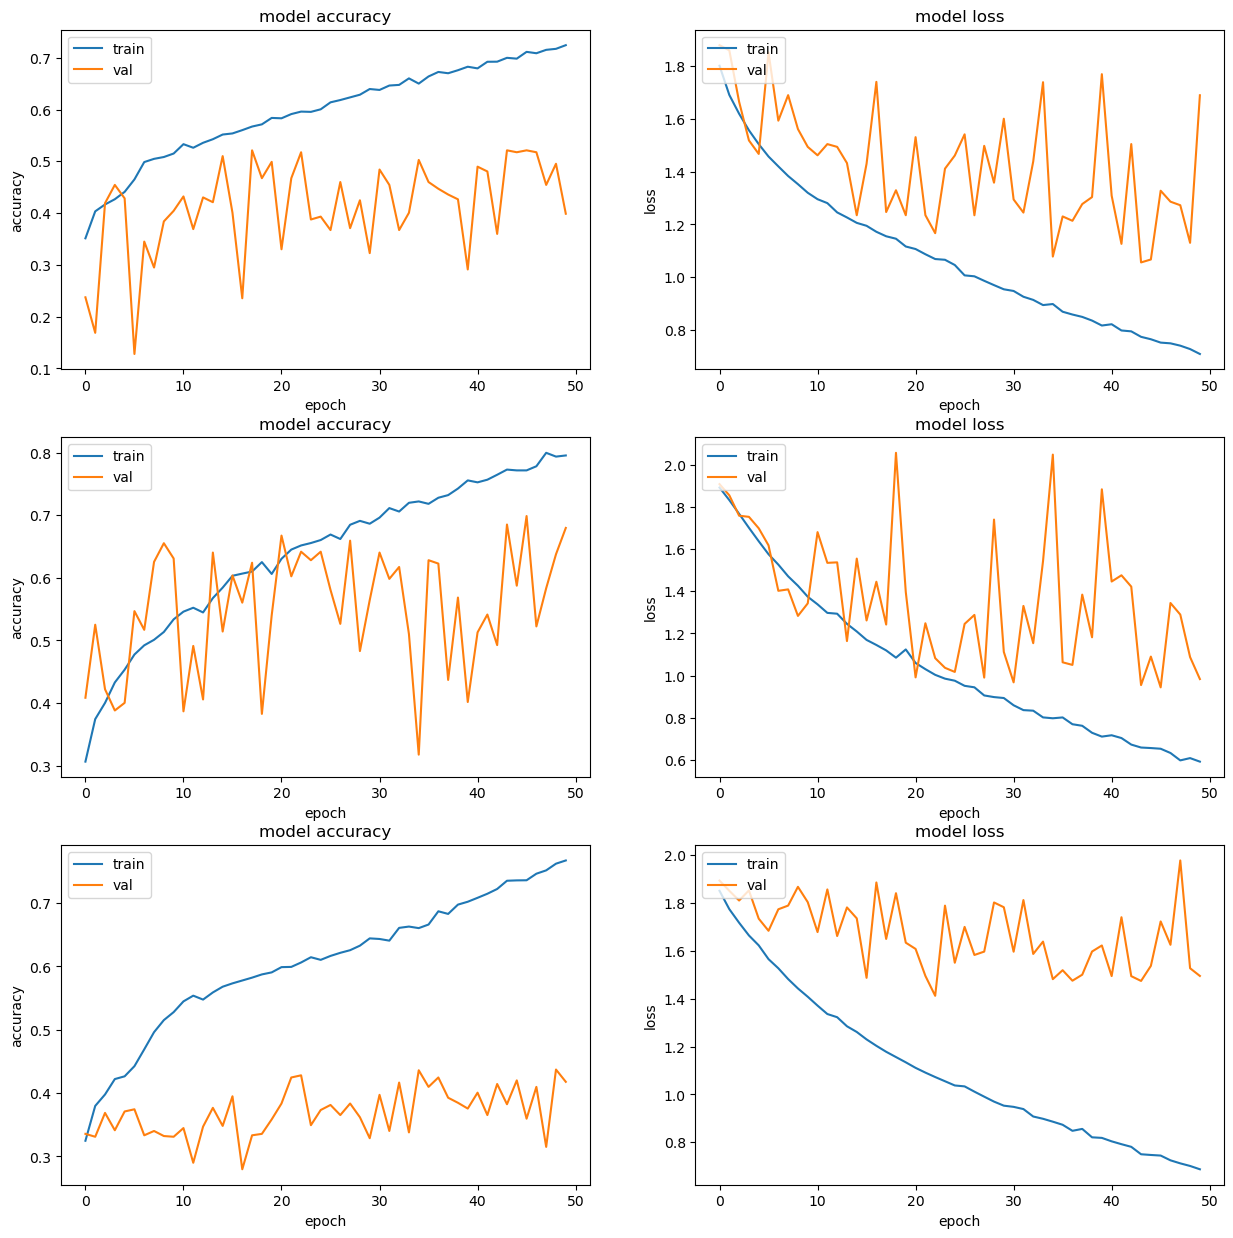

In [41]:
plot_stats(ac1_15)